In [1]:
import tensorflow as tf 
from tensorflow.keras.models import load_model

In [2]:
# load trained model
model = load_model('my_model.h5', compile=False)

# compile the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [3]:
test_dir = './dataset/test/'
IMG_SHAPE = (224, 224)

In [4]:
# preprocess images from directory
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="binary",
                                                                image_size=IMG_SHAPE)

Found 12461 files belonging to 2 classes.


In [5]:
# how good is our model on unknown data?
model.evaluate(test_data, verbose=1)

390/390 [==============================] - 198s 503ms/step - loss: 0.0267 - accuracy: 0.9933


[0.02670477330684662, 0.9933392405509949]

In [37]:
# our model needs the shape (224, 224, 3) 
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])
  return img

In [38]:
import matplotlib.pyplot as plt

# make a prediction on our random image
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))
 
  img = img/255.
  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

(-0.5, 1919.5, 1328.5, -0.5)

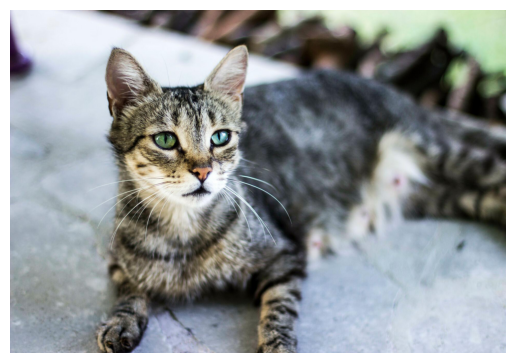

In [63]:
import matplotlib.image as mpimg 

# plot a random cat image
image = mpimg.imread('cat_example.jpg')
plt.imshow(image)
plt.axis(False)

1/1 [==============================] - 0s 42ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


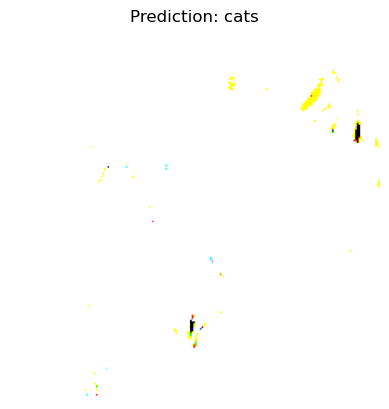

In [45]:
class_names = ['cats', 'dogs']

# plot the predicted class and image
pred_and_plot(model, 'cat_example.jpg', class_names)

(-0.5, 999.5, 666.5, -0.5)

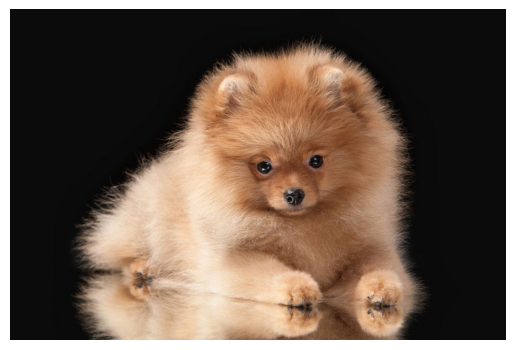

In [64]:
# plot a random dog image
image = mpimg.imread('dog_example.jpg')
plt.imshow(image)
plt.axis(False)

1/1 [==============================] - 0s 42ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


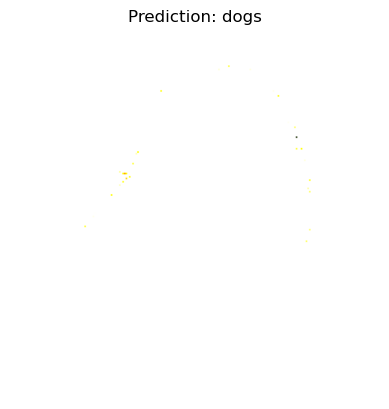

In [62]:
# plot the predicted class and image
pred_and_plot(model, 'dog_example.jpg', class_names)